**Student Name:** B M Nafis Fuad

**Student ID:** 274502

# Assignment 3

This assignment has one main part:

**PCA** : In this part the goal is to implement the dimensionality reduction technique *Principal Component Analysis (PCA)* to a very high dimensional data and apply visualization. Note that you are not allowed to use the built-in PCA API provided by the sklearn library. Instead you will be implementing from the scratch. Use the data in data/train.csv for generating the PCA. See the detailed intructions below.
    

For this task we use the  MovieLens dataset. The data is in train.csv.
   

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.linalg import sqrtm
from matplotlib.pyplot import *
from matplotlib.pyplot import legend
from sklearn import preprocessing

%matplotlib inline

# Part-1a: Convert data to user-movie rating matrix (10 points)
    - Read the train.csv file and movies.dat file and use user_id and movie_id to create user-movie rating matrix


In [229]:
def readMovieRatingData():
    # TODO Read the user-movie rating in data/train.csv and convert it to a user-movie rating matrix (users in the rows and movies in the colums)
    # Mind the header row in the train.csv
    user_rating = pd.read_csv('train.csv')
    user_rating_matrix = user_rating.pivot(index = 'user_id', columns = 'movie_id', values = 'rating').fillna(0)
    # pivot() allows us to transform a given dataframe by converting values of one or more columns into columns themselves,
    # making the data more easily digestible 
    # The index parameter specifies the column(s) to be used as the index of the resulting dataframe
    # the columns parameter specifies the column(s) to be used as the new column headers
    # The values parameter specifies the column(s) to be used as the values for the new columns
    # For our dataframe columns are movie id and index are user id, and the user rating are the values  
    return user_rating_matrix

In [230]:
readMovieRatingData()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [231]:
def readMovieDeata():
    # Read the movie data from data/movies.dat
    movie_data = pd.read_csv('movies.dat', sep= '::', engine = 'python', names = ['Movie_id','Movie Title','Genre'], encoding='utf-8', encoding_errors='ignore')
    return movie_data

In [232]:
movie_data = readMovieDeata()
movie_data

,Movie_id,Movie Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


## We are going to compute PCA for movies so transpose the matrix using X=readMovieRatingData().T


In [233]:
X = readMovieRatingData().T
X

user_id,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
movie_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,5.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part-1b: Preprocessing  (10 points)
Before implementing PCA you are required to perform some preprocessing steps:
1. Mean normalization: Replace each feature/attribute, $x_{ji}$ with $x_j - \mu_j$, In other words, determine the mean of each feature set, and then for each feature subtract the mean from the value, so we re-scale the mean to be 0 
2. Feature scaling: If features have very different scales then scale make them comparable by altering the scale, so they all have a comparable range of values e.g. $x_{ji}$ is set to $(x_j - \mu_j) / s_j$  Where $s_j$ is some measure of the range, so could be  $\max(x_j) - \min(x_j)$ or Standard deviation $stddev(x_j)$.

In [234]:
# TODO We can see features have very different scales. So we apply feature scaling with Standard 
# deviation as measure of the range, using StandardScaler from scikit-learn

X_normalized = preprocessing.normalize(X)
X_standardised = preprocessing.StandardScaler().fit_transform(X_normalized)

# Part-2: Covariance matrix  (15 points)
Now the preprocessing is finished. Next, as explained in the lecture, you need to compute the covariance matrix https://en.wikipedia.org/wiki/Covariance_matrix. Given $n \times m$ $n$ rows and $m$ columns matrix, a covariance matrix is an $n \times n$ matrix given as below (sigma)
$\Sigma = \frac{1}{m}\sum{\left(x^{i}\right)\times \left(x^{i}\right)^{T}}$
You may use the "numpy.cov" function in numpy library 

In [235]:
# Compute X to covariance matrix cov_matrix.
cov_matrix = np.cov(X_standardised.T)
cov_matrix

array([[ 1.00027285e+00,  4.49165741e-02,  1.85946012e-02, ...,
        -4.87962326e-03,  9.68330812e-02,  1.31331648e-02],
       [ 4.49165741e-02,  1.00027285e+00,  2.19762320e-02, ...,
         1.45274600e-02,  1.31090153e-02,  5.75916882e-02],
       [ 1.85946012e-02,  2.19762320e-02,  1.00027285e+00, ...,
         2.10170341e-02, -7.52054211e-04, -2.42251759e-03],
       ...,
       [-4.87962326e-03,  1.45274600e-02,  2.10170341e-02, ...,
         1.00027285e+00,  1.26195688e-01,  1.53609143e-02],
       [ 9.68330812e-02,  1.31090153e-02, -7.52054211e-04, ...,
         1.26195688e-01,  1.00027285e+00,  7.75745181e-03],
       [ 1.31331648e-02,  5.75916882e-02, -2.42251759e-03, ...,
         1.53609143e-02,  7.75745181e-03,  1.00027285e+00]])

# Instructions for part 3, 4, and 5
- getSVD() function is expected to return 3 values. For example: ```U, S, V = getSVD(cov_matrix)```
- You can follow the skeleton below to have an idea on how the autograder's test calls your functions:
```
U, S, V = getSVD(cov_matrix)
z = getKComponents(U, X, k)
ratio = getVarianceRatio(z, U, X, k)
```
- Using the built-in PCA implementation in sklearn, the approximate X matrix can be obtained by function ```inverse_transform```

# Part-3: SVD computation  (10 points)
Now compute the SVD on the covariance matrix $SVD(\Sigma)$. You may use the svd implementation in numpy.linalg.svd

In [236]:
def getSVD(cov_matrix):
    # this takes in a covariance matrix as input and returns the SVD (Singular Value Decomposition) of the matrix
    #TODO user np.linalg.svd here
    u,s,v = np.linalg.svd(cov_matrix,full_matrices=False)
    # This line computes the SVD of the input covariance matrix using the NumPy linalg.svd() function
    # full_matrices=False argument specifies that the function should return the reduced SVD, 
    # which only contains the singular values and vectors needed to reconstruct the original matrix
    return u, s, v
    # returns three arrays; u: contain the left singular vectors, s: singular values, v: right singular vectors of the matrix

In [237]:
U, S, V = getSVD(cov_matrix)

# Part-4: Compute PCA matrix (K dimensional)  (10 points)
Now select the first $k$ columns from the matrix $U$ and multiply with $X$ to get $k$ dimensional representation.

In [238]:
def getKComponents(U, X, K):
    # implement matrix multiplication of first k columns of U * X
    Z = np.dot(X, U[:,:K])
    return Z

In [239]:
Z = getKComponents(U, X_standardised, 100)
Z

array([[-51.65548799,  -9.25305488,  11.07999291, ...,   0.44429356,
          3.97653154,  -1.62627643],
       [-13.36901351,  12.22190522,  -6.39496707, ...,   4.2983439 ,
          2.6736538 ,  -1.69905092],
       [ -5.81188891,   6.04871792,   4.03225125, ...,   2.63124743,
          1.34630303,  -0.18777578],
       ...,
       [  8.76557027,  -0.66325566,   0.18253925, ...,   0.54741611,
         -1.4044026 ,   1.34966425],
       [  9.117934  ,  -1.35820419,   1.90124565, ...,   1.4196683 ,
         -0.08467317,   0.74222996],
       [ -5.14159126,  -3.70356745,   8.64295004, ...,   0.89326856,
          4.11865183,  -1.090349  ]])

# Part-5: Compute Reconstruction Error  (15 points)
Implement a function to compute the variance ratio (from reconstruction error)

In [240]:
def getVarianceRatio(Z, U, X, K):
    #Implement computation of reconstruction error
    X_approx_pca = np.dot(Z,((U[:,:K]).T))
    ratio = np.mean((X-X_approx_pca).T.dot(X-X_approx_pca))/np.mean(X.T.dot(X))
    return ratio

In [241]:
ratio = getVarianceRatio(Z, U, X_standardised, K=100)
ratio

0.0014923017068420822

Compare the variance ration to the built-in PCA implementation in sklearn https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html (this step is optional)

In [242]:
from sklearn.decomposition import PCA
k = 100
X_new = X_standardised
pca = PCA(n_components=k)
z_pca = pca.fit_transform(X_new)
X_approx_pca = pca.inverse_transform(z_pca)
ratio_pca = np.mean((X_new-X_approx_pca).T.dot(X_new-X_approx_pca))/np.mean(X_new.T.dot(X_new))
ratio_pca

0.0015633254933454998

# Part-6: Scatter plot 2-dimensional PCA  (10 points)
Using matplotlib plot the 2-dimensional scatter plot of the first 2 compoenents with y (movie genre from movies.dat file) as labels. Remember you are plotting movies in dimensions so you can label them with movie generes.

In [243]:
import matplotlib.pyplot as plt

movie_genre = movie_data["Genre"]
label_color = movie_data["Genre"]
label_colormap = {label: i for i, label in enumerate(set(label_color))}
col = [label_colormap[label] for label in label_color]
    
l = len(movie_genre)

def plotFunction(PCA, movie_data):
    plt.figure(figsize=(19,16))
    plot = plt.scatter(PCA[:l,0] , PCA[:l,1], s = 200, c = col, cmap = 'hsv')
    plt.title('Visualization of Two Dimensional PCA Scatter plot')
    plt.xlabel('First Component PCA',fontsize=10)
    plt.ylabel('Second Component PCA',fontsize=10)
    plt.legend(handles = plot.legend_elements()[0], labels = list(movie_data["Genre"]), fontsize = 10)
    plt.grid()
    plt.show()

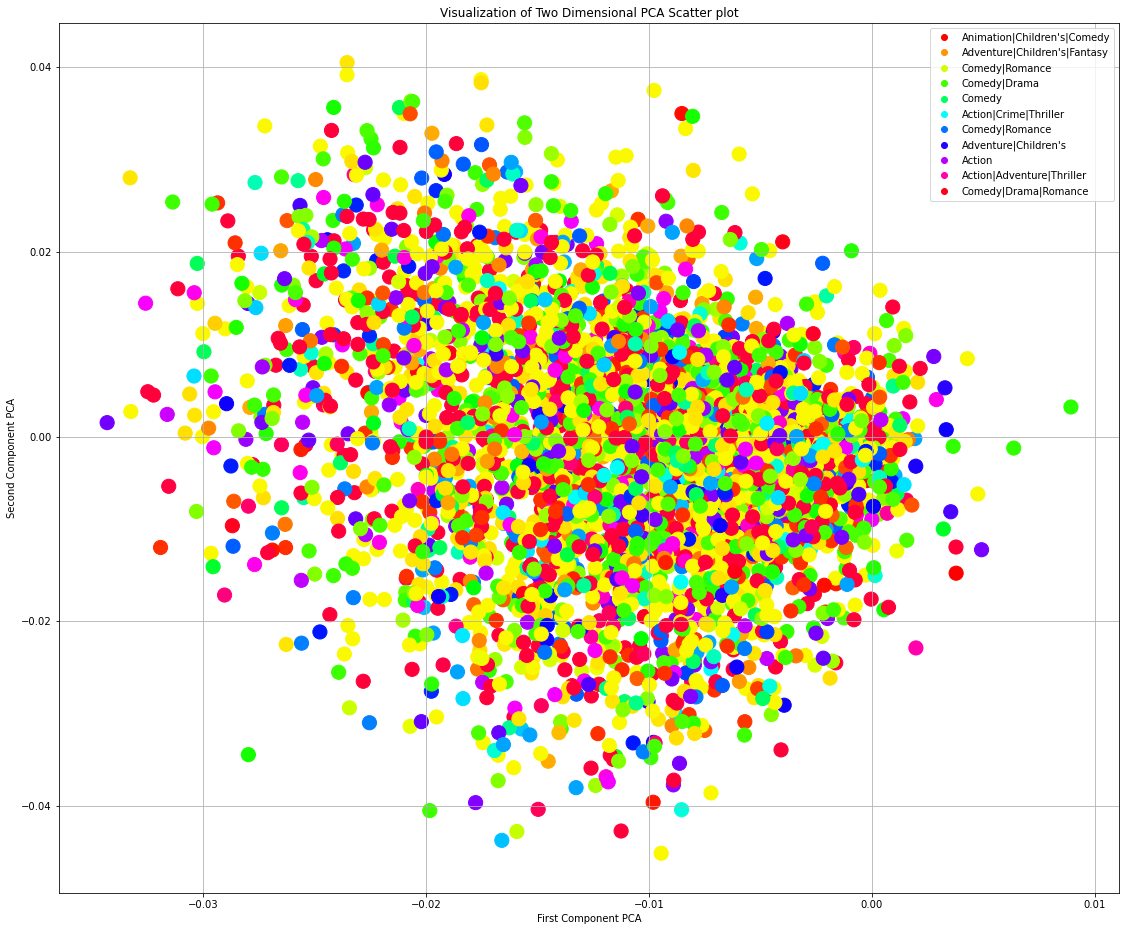

In [244]:
plotFunction(U, movie_data)

# Part-7 Find best $K$  (10 points)
Find the minimum value of $K$ with which the ratio between averaged squared projection error with total variation in data is less than 0.1% in other words we retain 99.9% of the variance. You can achieve this by repeating getKComponents with $K=1$ until the variance ratio is <= 0.1%.

In [245]:
def findBestK(initial, step, U, X):
    #TODO use the getVarianceRatio to find the best K
    
    #X = Feature_Scaling
    ratio = 1
    K = initial
    
    while ratio > 0.001:
    # by repeating getKComponents with  𝐾=1  until the variance ratio is <= 0.1% 
        K = K + step
        Z = getKComponents(U, X, K)
        ratio = getVarianceRatio(Z, U, X, K)
        print("\n K = " + str(K) + "\n ratio = " + str(ratio))
        
    return K, ratio

In [246]:
K, ratio  = findBestK(100, 20, U, X_new)
K, ratio


 K = 120
 ratio = 0.0013331759539957036

 K = 140
 ratio = 0.0012711176760880154

 K = 160
 ratio = 0.0012142697531019983

 K = 180
 ratio = 0.00117834936619221

 K = 200
 ratio = 0.0011222996210675372

 K = 220
 ratio = 0.00108385155252151

 K = 240
 ratio = 0.001041476869854012

 K = 260
 ratio = 0.0010093491120399352

 K = 280
 ratio = 0.000979103908050117


(280, 0.000979103908050117)

# Part-8: TSNE visualization (10 points)
Finally, having found an optimal $K$ use these components as an input data to another dimensionality reduction method called tSNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) and reduce it to 2 dimensions.

In [247]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 42)
tsne_pca_results = tsne.fit_transform(z_pca)

Finally, scatter plot the components given by the tSNE using matplotlib compare it to the earlier scatter plot.

In [248]:
movie_genre = movie_data["Genre"]
label_color = movie_data["Genre"]
label_colormap = {label: i for i, label in enumerate(set(label_color))}
col = [label_colormap[label] for label in label_color]
    
l = len(movie_genre)

def plotFunction(tsne_pca_results, movie_data):
    plt.figure(figsize=(19,16))
    plot = plt.scatter(tsne_pca_results[:l,0] , tsne_pca_results[:l,1], s = 200, c = col, cmap = 'hsv')
    plt.title('Visualization of Two Dimensional PCA Scatter plot')
    plt.xlabel('First Component PCA',fontsize=10)
    plt.ylabel('Second Component PCA',fontsize=10)
    plt.legend(handles = plot.legend_elements()[0], labels = list(movie_data["Genre"]), fontsize = 10)
    plt.grid()
    plt.show()

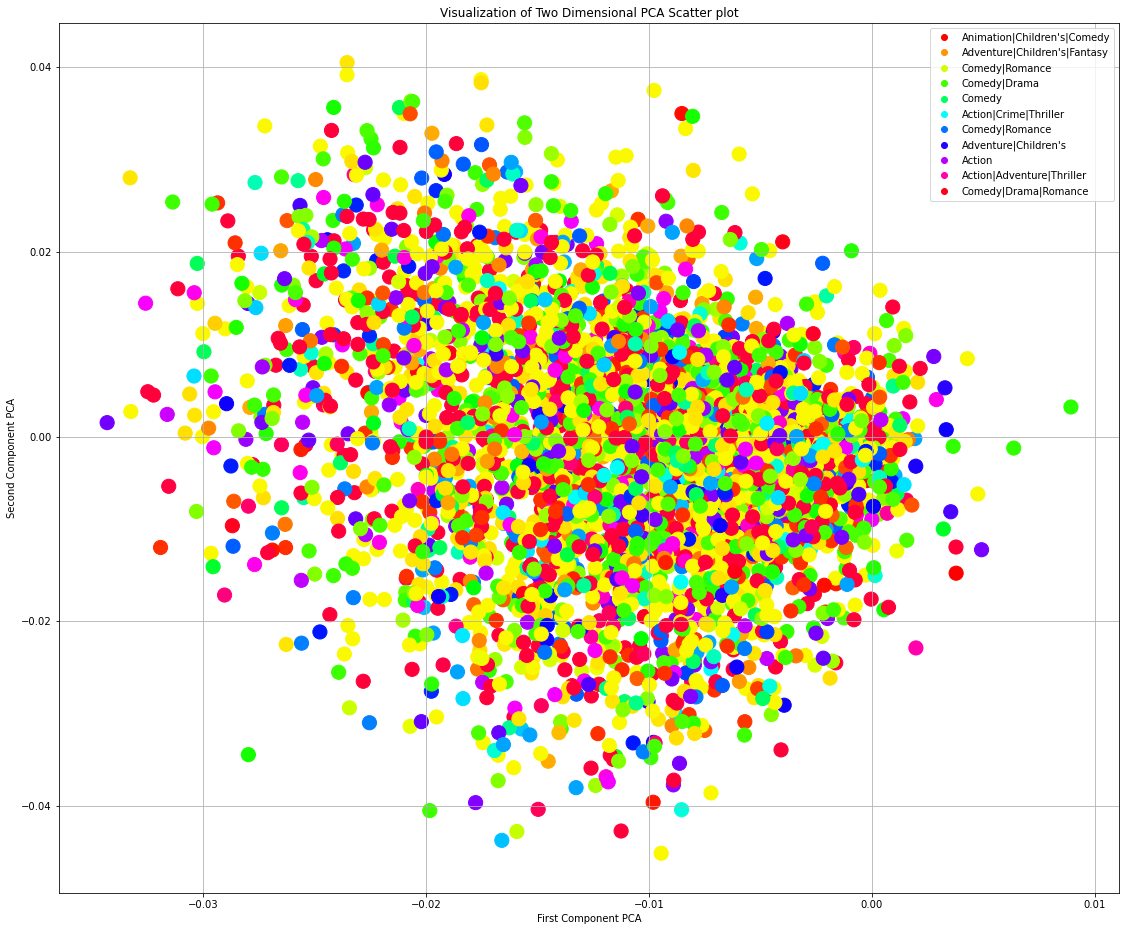

In [249]:
# Scatter plot the 2-dimensional tsne compoents with target as labels
plotFunction(U, movie_data)